<a href="https://colab.research.google.com/github/doandongdu/DUDOAN12/blob/main/KHUON_MAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
train_image = '/content/drive/MyDrive/khuon_mat/data/train'
valid_image = '/content/drive/MyDrive/khuon_mat/data/valid'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
train_set = train_datagen.flow_from_directory(train_image,target_size=(200,200),class_mode='categorical')
validation_set = validation_datagen.flow_from_directory(valid_image,target_size=(200,200),class_mode='categorical')

Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [6]:
x_train, y_train = next(train_set)

In [7]:
x_train.shape

(32, 200, 200, 3)

In [8]:
y_train.shape

(32, 3)

In [9]:
label = ['Du','Hieu','Son']

In [10]:
from keras.models import Sequential, Model 
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
from keras import models
model = models.Sequential()
model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu', input_shape = (200,200,3), padding = 'same'))

In [12]:
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [13]:
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics = ["accuracy"])

In [14]:
history = model.fit(train_set, epochs = 100, batch_size = 128, verbose = 1, validation_data = validation_set, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 30)])

Epoch 1/100
4/4 [==============================] - 87s 22s/step - loss: 1.0438 - accuracy: 0.4667 - val_loss: 0.4154 - val_accuracy: 1.0000
Epoch 2/100
4/4 [==============================] - 49s 13s/step - loss: 0.3218 - accuracy: 1.0000 - val_loss: 0.0976 - val_accuracy: 1.0000
Epoch 3/100
4/4 [==============================] - 49s 13s/step - loss: 0.0433 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4/100
4/4 [==============================] - 50s 13s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 7.1542e-05 - val_accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 49s 13s/step - loss: 3.2716e-05 - accuracy: 1.0000 - val_loss: 1.1613e-06 - val_accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 53s 15s/step - loss: 2.1756e-07 - accuracy: 1.0000 - val_loss: 4.8677e-08 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 49s 14s/step - loss: 7.9473e-09 - accuracy: 1.0000 - val_loss: 1.4901e-08 - val_accuracy:

In [15]:
model.save('khuon_mat.h5')

In [17]:
metric = model.evaluate(x_train,y_train,verbose=2)
print('sai so',metric[0])
print('do chinh xac',metric[1])

1/1 - 2s - loss: 0.0000e+00 - accuracy: 1.0000 - 2s/epoch - 2s/step
sai so 0.0
do chinh xac 1.0


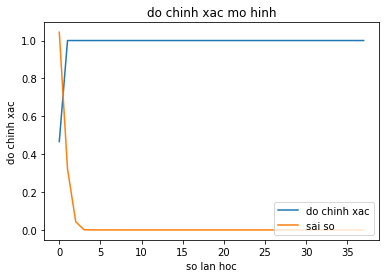

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('do chinh xac mo hinh')
plt.ylabel('do chinh xac')
plt.xlabel('so lan hoc')
plt.legend(['do chinh xac', 'sai so'], loc = 'lower right')

1/1 [==============================] - 0s 50ms/step
[[1.2011931e-15 0.0000000e+00 1.0000000e+00]]
1/1 [==============================] - 0s 49ms/step
Đây là  Son


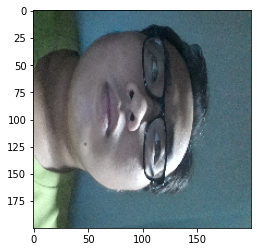

In [21]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import numpy as np
from keras.models import load_model
img=load_img('/content/drive/MyDrive/khuon_mat/data/train/son/20221031_222654.jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a = int(np.argmax(model.predict(img), axis = 1))
print("Đây là ", label[a])

1/1 [==============================] - 0s 45ms/step
[[1.0000000e+00 0.0000000e+00 1.0740719e-15]]
1/1 [==============================] - 0s 47ms/step
Đây là  Du


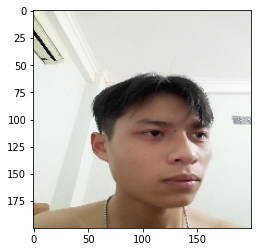

In [24]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import numpy as np
from keras.models import load_model
img=load_img('/content/drive/MyDrive/khuon_mat/data/train/du/IMG_20221114_191619.jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a = int(np.argmax(model.predict(img), axis = 1))
print("Đây là ", label[a])